
# K Means Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.datasets import make_blobs

In [2]:
data = make_blobs(n_samples=500,n_features=2,centers=5,cluster_std=1.8,random_state=101)
data[0].shape

(500, 2)

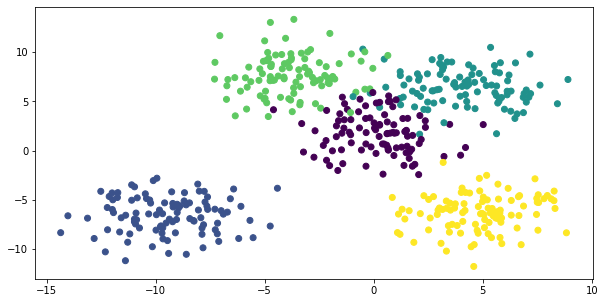

In [3]:
plt.figure(figsize=(10,5))
plt.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='viridis')


In [4]:
from sklearn.cluster import KMeans
import warnings
warnings.simplefilter(action='ignore')

In [5]:
kmeans = KMeans(n_clusters=3)

In [6]:
kmeans.fit(data[0])

KMeans(n_clusters=3)

In [7]:
kmeans.cluster_centers_

array([[ 4.51384819, -5.80120894],
       [ 0.10093346,  5.5082598 ],
       [-9.45302654, -6.55168177]])

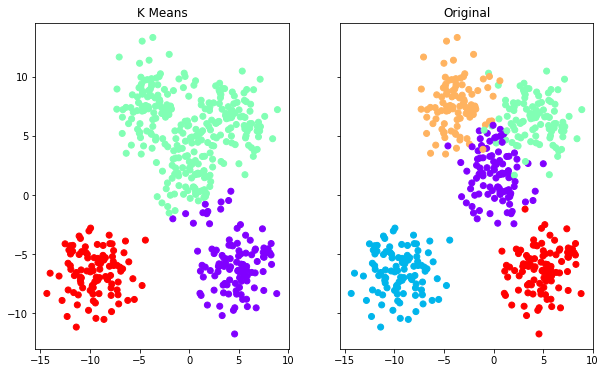

In [8]:
fig, (ax1,ax2) = plt.subplots(1,2, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(data[0][:,0],data[0][:,1],c=kmeans.labels_,cmap='rainbow')

ax2.set_title('Original')
ax2.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

# K Means Clustering Project 
For this project we will attempt to use KMeans Clustering to cluster Universities into to two groups, Private and Public.

It is very important to note, we actually have the labels for this data set, but we will NOT use them for the KMeans clustering algorithm, since that is an unsupervised learning algorithm.

When using the Kmeans algorithm under normal circumstances, it is because you don't have labels. In this case we will use the labels to try to get an idea of how well the algorithm performed, but you won't usually do this for Kmeans, so the classification report and confusion matrix at the end of this project, don't truly make sense in a real world setting!.



# The Data
We will use a data frame with 777 observations on the following 18 variables.

Private A factor with levels No and Yes indicating private or public university
Apps Number of applications received
Accept Number of applications accepted
Enroll Number of new students enrolled
Top10perc Pct. new students from top 10% of H.S. class
Top25perc Pct. new students from top 25% of H.S. class
F.Undergrad Number of fulltime undergraduates
P.Undergrad Number of parttime undergraduates
Outstate Out-of-state tuition
Room.Board Room and board costs
Books Estimated book costs
Personal Estimated personal spending
PhD Pct. of faculty with Ph.D.’s
Terminal Pct. of faculty with terminal degree
S.F.Ratio Student/faculty ratio
perc.alumni Pct. alumni who donate
Expend Instructional expenditure per student
Grad.Rate Graduation rate

In [9]:
df = pd.read_csv('College_Data',index_col=0)

In [10]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

In [12]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


# EDA
It's time to create some data visualizations!

scatterplot of Grad.Rate versus Room.Board where the points are colored by the Private column. **

<AxesSubplot:xlabel='Room.Board', ylabel='Grad.Rate'>

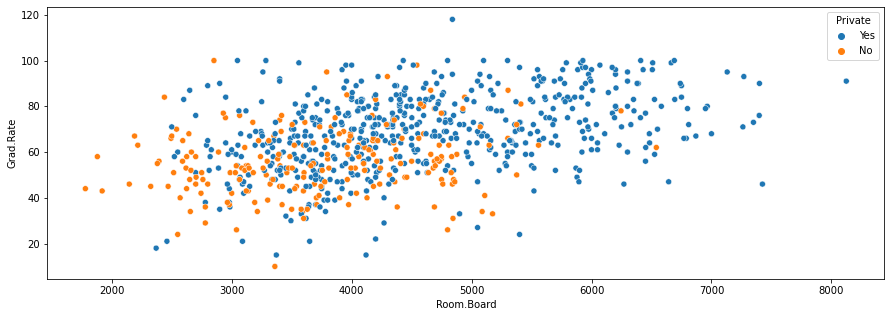

In [13]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='Room.Board',y='Grad.Rate',data=df,hue='Private')

 scatterplot of F.Undergrad versus Outstate where the points are colored by the Private column.

<AxesSubplot:xlabel='Outstate', ylabel='F.Undergrad'>

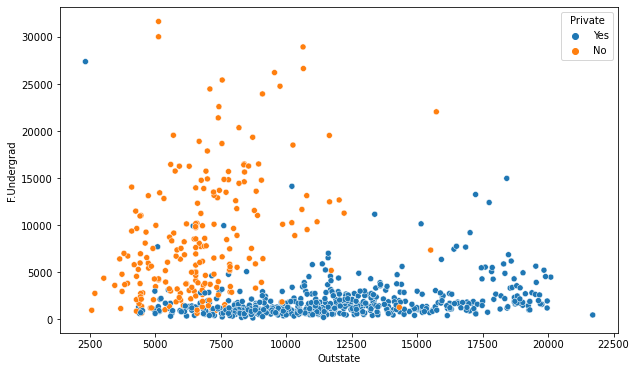

In [14]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Outstate',y='F.Undergrad',data=df,hue='Private')

Wall time: 255 ms


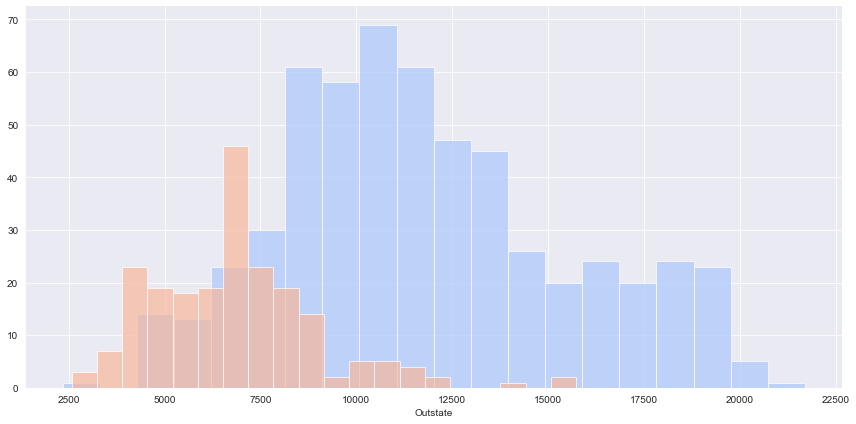

In [15]:
%%time
sns.set_style('darkgrid')
g=sns.FacetGrid(df,hue='Private',palette='coolwarm',size=6,aspect=2)
g=g.map(plt.hist,'Outstate',bins=20,alpha=0.7)

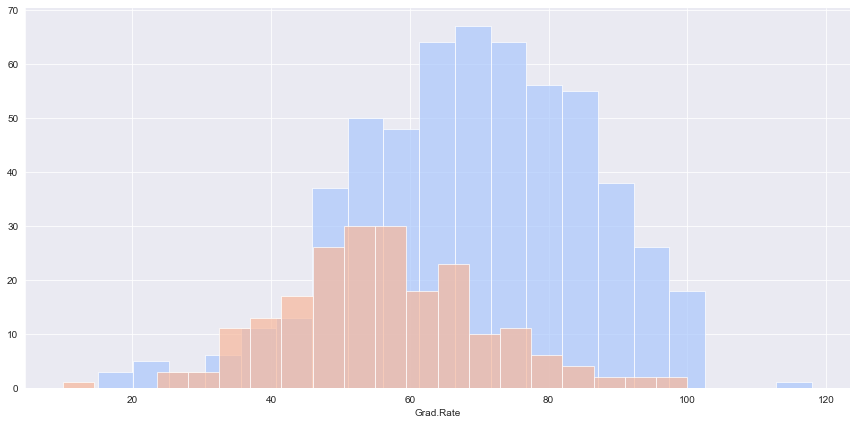

In [16]:
sns.set_style('darkgrid')
g=sns.FacetGrid(df,hue='Private',palette='coolwarm',size=6,aspect=2)
g=g.map(plt.hist,'Grad.Rate',bins=20,alpha=0.7)

In [17]:
df.head()


,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [18]:
df1 = df[df['Grad.Rate']<=100]

In [19]:
df1[df1['Grad.Rate']>100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


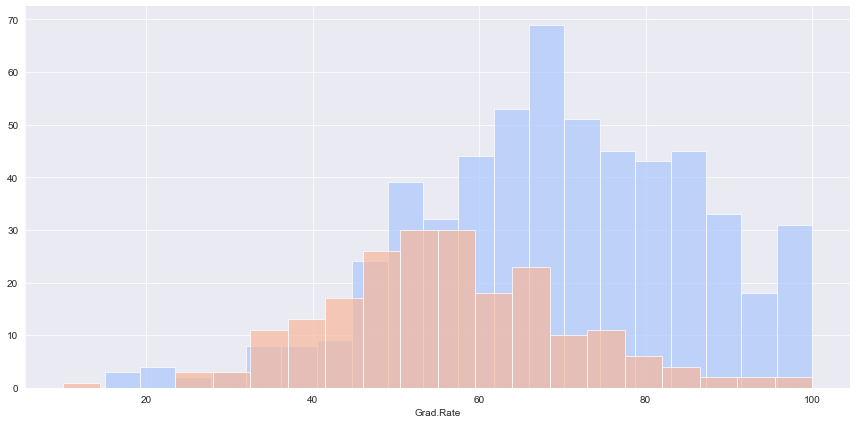

In [20]:
sns.set_style('darkgrid')
g=sns.FacetGrid(df1,hue='Private',palette='coolwarm',size=6,aspect=2)
g=g.map(plt.hist,'Grad.Rate',bins=20,alpha=0.7)

In [21]:
km = KMeans(n_clusters=2)


In [22]:
km.fit(df1.drop('Private',axis=1))

KMeans(n_clusters=2)

In [23]:
km.cluster_centers_

array([[1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01],
       [1.81019012e+03, 1.28395359e+03, 4.90991018e+02, 2.53338323e+01,
        5.34985030e+01, 2.19031287e+03, 5.96332335e+02, 1.03972231e+04,
        4.31057335e+03, 5.41895210e+02, 1.28150449e+03, 7.05149701e+01,
        7.78712575e+01, 1.40994012e+01, 2.31796407e+01, 8.93389521e+03,
        6.50404192e+01]])

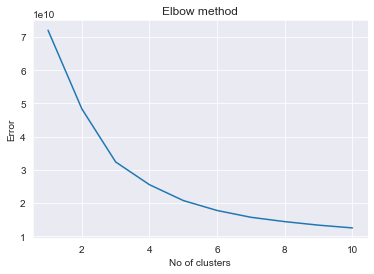

In [24]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df1.drop('Private',axis=1))
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

# Evaluation¶
.

 New column for df called 'Cluster', which is a 1 for a Private school, and a 0 for a public school.

In [25]:
def converter(cluster):
    if cluster == 'Yes':
        return 1
    else:
        return 0
    

In [26]:
df1['Cluster'] = df1["Private"].apply(converter)

In [27]:
df1.drop("Private",axis=1,inplace=True)

In [28]:
df1.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


In [29]:
df1['Private'] = df['Private']

In [30]:
df1[['Cluster','Private']]

,Cluster,Private
Abilene Christian University,1,Yes
Adelphi University,1,Yes
Adrian College,1,Yes
Agnes Scott College,1,Yes
Alaska Pacific University,1,Yes
...,...,...
Worcester State College,0,No
Xavier University,1,Yes
Xavier University of Louisiana,1,Yes
Yale University,1,Yes


# Our Model Performed good !!